In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np

In [6]:
salarydata = pd.read_csv("D:\ExcelR\Assigments\Simple_linear_Regression\Salary_Data.csv")
salarydata

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [17]:
salarydata.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [18]:
salarydata.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

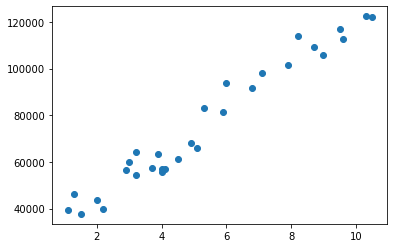

In [19]:
plt.scatter(x='YearsExperience',y='Salary',data = salarydata)

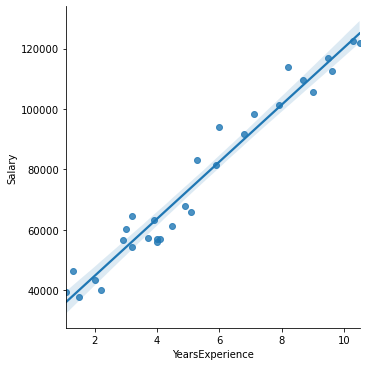

In [20]:
sns.lmplot(x='YearsExperience',y='Salary',data = salarydata)

In [21]:
linear_models= LinearRegression

In [22]:
linear_model = smf.ols(formula='Salary~YearsExperience',data=salarydata)

In [23]:
linear_model = linear_model.fit()

In [24]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [25]:
predicted = linear_model.predict(salarydata)
predicted

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [26]:
salarydata['predicted'] = predicted

In [27]:
salarydata

,YearsExperience,Salary,predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [28]:
y = salarydata['Salary']

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean square error is: ',mean_squared_error(y,predicted))
print('R2 score is: ',r2_score(y,predicted))

Mean square error is:  31270951.72228097
R2 score is:  0.9569566641435086


## Logrthhm transformation

In [13]:
log_x = np.log(salarydata['YearsExperience'].values.reshape(-1,1))
log_y = np.log(salarydata['Salary'].values.reshape(-1,1))

In [9]:
from sklearn.model_selection import train_test_split

In [14]:
X_train_log, X_test_1og, Y_train_log, Y_test_log = train_test_split(log_x, log_y, test_size=0.2, random_state= 12)

In [15]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log,Y_train_log)

LinearRegression()

In [17]:
y_pred_log.intercept_

array([10.2795247])

In [18]:
y_pred_log.coef_

array([[0.59081935]])

In [19]:
l_model= y_pred_log.predict(X_test_1og)
l_model

array([[10.96673671],
       [11.50066722],
       [11.3282009 ],
       [11.16816273],
       [10.43453458],
       [11.43758663]])

In [35]:
pf = pd.DataFrame({'Actual':Y_test_log.flatten(), 'Predict': l_model.flatten()})
pf

,Actual,Predict
0,10.904946,10.966737
1,11.525861,11.500667
2,11.306676,11.328201
3,11.020447,11.168163
4,10.740843,10.434535
5,11.495505,11.437587


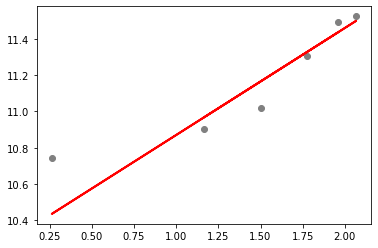

In [22]:
plt.scatter(X_test_1og, Y_test_log,  color='gray')
plt.plot(X_test_1og, l_model, color='red', linewidth=2)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean square error is: ',mean_squared_error(Y_test_log, l_model))
print('R2 score is: ',r2_score(Y_test_log, l_model))

Mean square error is:  0.020652589472808302
R2 score is:  0.7652917621367056


## SQRT transformation

In [28]:
sqrt_x = (salarydata['YearsExperience']**(1/2)).values.reshape(-1,1)
sqrt_y = (salarydata['Salary']**(1/2)).values.reshape(-1,1)

In [29]:
X_train_sqrt, X_test_sqrt, Y_train_sqrt, Y_test_sqrt = train_test_split(sqrt_x, sqrt_y, test_size=0.2, random_state= 22)

In [30]:
y_pred_sqrt= LinearRegression()
y_pred_sqrt.fit(X_train_sqrt,Y_train_sqrt)

LinearRegression()

In [31]:
y_pred_sqrt.intercept_

array([100.79623522])

In [32]:
y_pred_sqrt.coef_

array([[75.61169641]])

In [33]:
s_model = y_pred_sqrt.predict(X_test_sqrt)

In [36]:
df = pd.DataFrame({'Actual':Y_test_sqrt.flatten(), 'Predict': s_model.flatten()})
df

,Actual,Predict
0,342.007310,333.847135
1,330.803567,323.818698
2,335.611382,335.070508
3,214.953483,187.006833
4,337.360341,317.315183
5,306.496330,286.006310


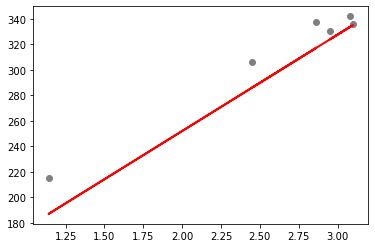

In [38]:
plt.scatter(X_test_sqrt, Y_test_sqrt,  color='gray')
plt.plot(X_test_sqrt, s_model, color='red', linewidth=2)
plt.show()

In [39]:
print('Mean square error is: ',mean_squared_error(Y_test_sqrt, s_model))
print('R2 score is: ',r2_score(Y_test_sqrt, s_model))

Mean square error is:  286.38898420983577
R2 score is:  0.8555923094143273


## Reciprocal Transformation 

In [40]:
rcp_x = (1/salarydata['YearsExperience']).values.reshape(-1,1)
rcp_y = (1/salarydata['Salary']).values.reshape(-1,1)

In [41]:
X_train_rcp, X_test_rcp, Y_train_rcp, Y_test_rcp = train_test_split(rcp_x, rcp_y, test_size=0.2, random_state= 32)

In [42]:
y_pred_rcp= LinearRegression()
y_pred_rcp.fit(X_train_rcp,Y_train_rcp)

LinearRegression()

In [44]:
print('intercept-',y_pred_rcp.intercept_)
print('coeff-',y_pred_rcp.coef_)

intercept- [7.41436467e-06]
coeff- [[2.77648029e-05]]


In [45]:
r_model = y_pred_rcp.predict(X_test_rcp)

In [46]:
mf = pd.DataFrame({'Actual':Y_test_rcp.flatten(), 'Predict': r_model.flatten()})
mf

,Actual,Predict
0,0.000025,0.000033
1,0.000018,0.000014
2,0.000017,0.000017
3,0.000018,0.000014
4,0.000010,0.000011
5,0.000015,0.000013


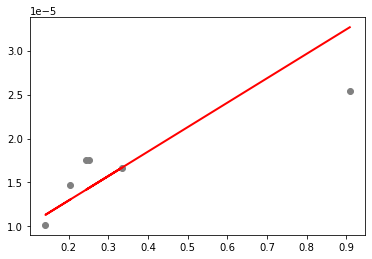

In [47]:
plt.scatter(X_test_rcp, Y_test_rcp,  color='gray')
plt.plot(X_test_rcp, r_model, color='red', linewidth=2)
plt.show()

In [48]:
print('Mean square error is: ',mean_squared_error(Y_test_rcp, r_model))
print('R2 score is: ',r2_score(Y_test_rcp, r_model))

Mean square error is:  1.2957911064881658e-11
R2 score is:  0.3696818335987154
